# Coloring and exporting graphical models as image (pdf, png)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [3]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.flow.row(bn,gnb.getInference(bn))

## customizing colours and width for model and inference

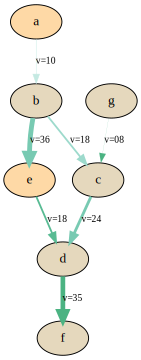

In [4]:
def nodevalue(n):
    return 0.5 if n in "aeiou" else 0.7
def arcvalue(a):
    return (10-a[0])*a[1]
def arcvalue2(a):
    return (a[0]+a[1]+5)/22
gnb.showBN(bn,
           nodeColor={n:nodevalue(n) for n in bn.names()},
           arcWidth={a:arcvalue(a) for a in bn.arcs()},
           arcLabel={a:f"v={arcvalue(a):02d}" for a in bn.arcs()},
           arcColor={a:arcvalue2(a) for a in bn.arcs()})

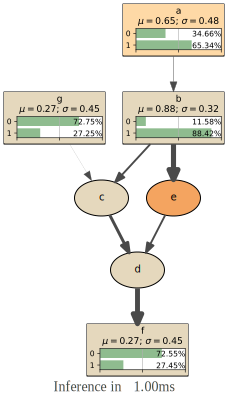

In [5]:
gnb.showInference(bn,
           targets={"a","g","f","b"},
           evs={'e':0},
           nodeColor={n:nodevalue(n) for n in bn.names()},
           arcWidth={a:arcvalue(a) for a in bn.arcs()})

In [6]:
gnb.flow.row(gnb.getBN(bn,
                       nodeColor={n:nodevalue(n) for n in bn.names()},
                       arcWidth={a:arcvalue(a) for a in bn.arcs()}),
             gnb.getInference(bn,
                              nodeColor={n:nodevalue(n) for n in bn.names()},
                              arcWidth={a:arcvalue(a) for a in bn.arcs()})
            )

In [7]:
import matplotlib.pyplot as plt
mycmap=plt.get_cmap('Reds')
formyarcs=plt.get_cmap('winter')
gnb.flow.row(gnb.getBN(bn,
                       nodeColor={n:nodevalue(n) for n in bn.names()},
                       arcColor={a:arcvalue2(a) for a in bn.arcs()},
                       cmapNode=mycmap,
                       cmapArc=formyarcs),
             gnb.getInference(bn,
                              nodeColor={n:nodevalue(n) for n in bn.names()},
                              arcColor={a:arcvalue2(a) for a in bn.arcs()},
                              arcWidth={a:arcvalue(a) for a in bn.arcs()},
                              cmapNode=mycmap,
                              cmapArc=formyarcs)
              )

TypeError: getBN() got an unexpected keyword argument 'cmapNode'

## Exporting model and inference as image

Exporting as image (pdf, png, etc.) has been gathered in 2 functions : `pyAgrum.lib.image.export()` and `pyAgrum.lib.image.exportInference()`. The argument are the same as for `pyAgrum.notebook.show{Model}` and `pyAgrum.notebook.show{Inference}`.

In [8]:
import pyAgrum.lib.image as gumimage
from IPython.display import Image # to display the exported images

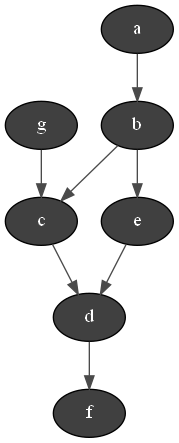

In [9]:
gumimage.export(bn,"out/test_export.png")

Image(filename='out/test_export.png') 

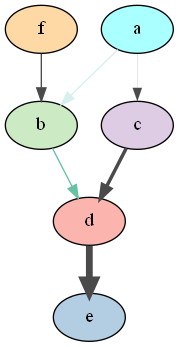

In [10]:
bn = gum.fastBN("a->b->d;a->c->d[3]->e;f->b")
gumimage.export(bn,"out/test_export.png",
                nodeColor={'a': 1,
                           'b': 0.3,
                           'c': 0.4,
                           'd': 0.1,
                           'e': 0.2,
                           'f': 0.5},
                arcColor={(0, 1): 0.2,
                          (1, 2): 0.5},
                arcWidth={(0, 3): 0.4,
                          (3, 2): 0.5,
                          (2,4) :0.6})

Image(filename='out/test_export.png') 

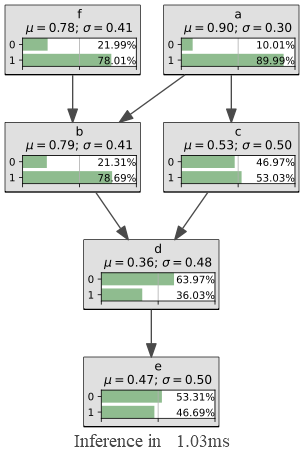

In [11]:
gumimage.exportInference(bn,"out/test_export.png")

Image(filename='out/test_export.png')

In [12]:
gumimage.export(bn,"out/test_export.pdf")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>


### exporting inference with evidence

In [13]:
bn=gum.loadBN("res/alarm.dsl")
gumimage.exportInference(bn,"out/test_export.pdf", 
                         evs={"CO":1,"VENTLUNG":1},
                         targets={"VENTALV",
                                  "CATECHOL",
                                  "HR",
                                  "MINVOLSET",
                                  "ANAPHYLAXIS",
                                  "STROKEVOLUME",
                                  "ERRLOWOUTPUT",
                                  "HBR",
                                  "PULMEMBOLUS",
                                  "HISTORY",
                                  "BP",
                                  "PRESS",
                                  "CO"},
                         size="15!")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>

### Other models

Other models can also use these functions.

In [14]:
infdiag=gum.loadID("res/OilWildcatter.bifxml")
gumimage.export(infdiag,"out/test_export.pdf")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>

In [15]:
gumimage.exportInference(infdiag,"out/test_export.pdf")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>

### Exporting any object with `toDot()` method

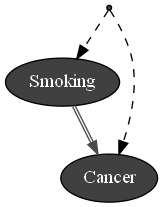

In [16]:
import pyAgrum.causal as csl
obs1 = gum.fastBN("Smoking->Cancer")
modele3 = csl.CausalModel(obs1, [("Genotype", ["Smoking","Cancer"])], True)
gumimage.export(modele3,"out/test_export.png") # a causal model has a toDot method.
Image(filename='out/test_export.png')

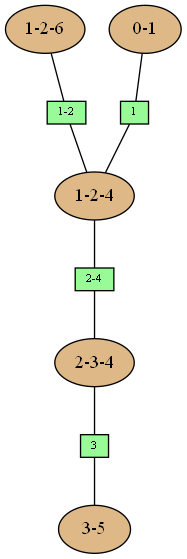

In [17]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
ie=gum.LazyPropagation(bn)
jt=ie.junctionTree()
gumimage.export(jt,"out/test_export.png") # a JunctionTree has a method jt.toDot()
Image(filename='out/test_export.png')

### ... or even a string in dot syntax

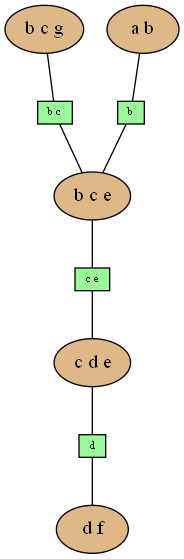

In [18]:
gumimage.export(jt.toDotWithNames(bn),"out/test_export.png") # jt.toDotWithNames(bn) creates a dot-string for a junction tree with names of variables
Image(filename='out/test_export.png')

### Exporting to pyplot

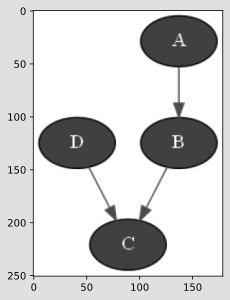

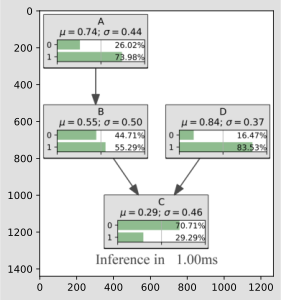

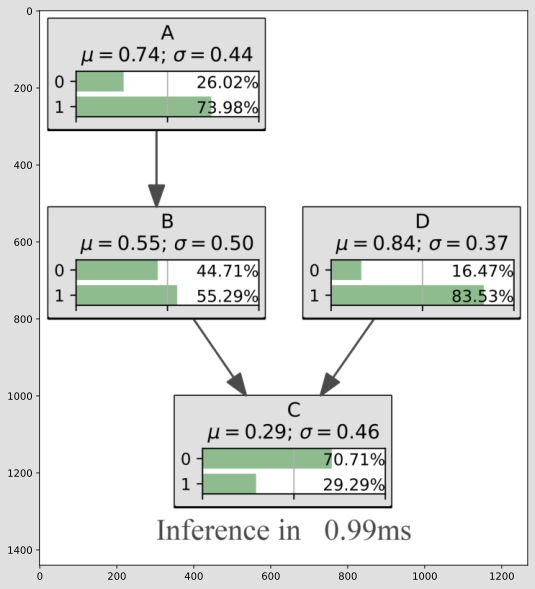

In [19]:
import matplotlib.pyplot as plt

bn=gum.fastBN("A->B->C<-D")

plt.imshow(gumimage.export(bn))
plt.show()

plt.imshow(gumimage.exportInference(bn,size="15!"))
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(gumimage.exportInference(bn,size="15!"))
plt.show()